### **1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.**

The resulting matrix of this operation will be a n X m matrix where this nXm is the numnber of elements in the new matrix. For each such element, we will need to perform multiplication of elements along the row of the first matrix and corresponding column of the second matrix. Thus this operation will have multiplication performed for k elements and k-1 additions. Thus,
\
**Number of multiplications = n X m X k**
\
**Number of additions = n X m X (k-1)**


### **2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?**

In [5]:
def multiplyMatrices(A, B):
    n = len(A)
    k = len(A[0])
    m = len(B[0])

    productMatrix = [[0] * m for _ in range(n)]

    for i in range(n):
        for j in range(m):
            for x in range(k):
                productMatrix[i][j] += A[i][x] * B[x][j]

    return productMatrix

In [6]:
import numpy as np
import time

n, k, m = 500, 50, 80
A = np.random.rand(n, k)
B = np.random.rand(k, m)

# Matrix multiplication using list of lists
startTime = time.time()
resultList = multiplyMatrices(A.tolist(), B.tolist())
listTime = time.time() - startTime

startTime = time.time()
resultNumpy = np.dot(A, B)
numpyTime = time.time() - startTime


print(f"Time using list of lists: {listTime} seconds")
print(f"Time using NumPy: {numpyTime} seconds")


Time using list of lists: 0.3667173385620117 seconds
Time using NumPy: 0.007764577865600586 seconds


### **3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?**

The time complexity of the algorithm that is presented earlier will be n^2. For each element in the array we need to find the largest, second largest, third largest and so on for all the elements.
\
A better method would be to sort the given array and then directly reach the middle element in one shot. Such sorting can be done with algorithms like the merge sort.
\
The implementations are presented below:

In [5]:
import numpy as np
import time

def findMedianSort(arr):
    sortedArr = sorted(arr)
    n = len(sortedArr)
    if n % 2 == 0:
        return (sortedArr[n // 2 - 1] + sortedArr[n // 2]) / 2
    else:
        return sortedArr[n // 2]

def findMedianPass(arr):
    n = len(arr)
    for _ in range(n // 2):
        maxElement = max(arr)
        arr.remove(maxElement)

    if n % 2 == 0:
        # If the array has an even length, return the average of the two middle elements
        return (max(arr) + maxElement) / 2
    else:
        # If the array has an odd length, return the middle element
        return max(arr)

arr = np.random.rand(10**4)

startTime = time.time()
medianSort = findMedianSort(arr)
sortTime = time.time() - startTime

startTime = time.time()
medianPass = findMedianPass(arr.tolist())
passTime = time.time() - startTime

startTime = time.time()
medianNumpy = np.median(arr)
numpyTime = time.time() - startTime

print(f"Time using sorting: {sortTime} seconds")
print(f"Time using pass: {passTime} seconds")
print(f"Time using NumPy: {numpyTime} seconds")


Time using sorting: 0.007784843444824219 seconds
Time using pass: 0.8124690055847168 seconds
Time using NumPy: 0.0005283355712890625 seconds


As the results would suggest, the time takesn in the case of passing throughtout the array is more than the solution that I has suggested and finally the time taken by Numpy function is the least.

### **4. What is the gradient of the following function with respect to x and y?**
### **$$ x^3y + y^3\sin(x) $$**

given function: $$ f(x, y) = x^3y + y^3\sin(x) $$
\
partial derivative wiith respect to x: $$ \frac{\partial f}{\partial x} = 3x^2y + y^3\cos(x) $$
\
partial derivative with respect to y: $$ \frac{\partial f}{\partial y} = x^3 + 3y^2\sin(x) $$
\gradient vector is given by: $$ \nabla f = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right) = \left(3x^2y + y^3\cos(x), x^3 + 3y^2\sin(x)\right) $$


### **5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y**

In [9]:
import jax
import jax.numpy as jnp

def f(x, y):
    return x**3 * y + y**3 * jnp.sin(x)

def analyticalGradient(x, y):
    df_dx = 3 * x**2 * y + y**3 * jnp.cos(x)
    df_dy = x**3 + 3 * y**2 * jnp.sin(x)
    return jnp.array([df_dx, df_dy])

gradF = jax.grad(f, argnums=(0, 1))

rng = jax.random.PRNGKey(0)
xValues = jax.random.uniform(rng, shape=(5,))
yValues = jax.random.uniform(rng, shape=(5,))

for x, y in zip(xValues, yValues):
    analyticalResult = analyticalGradient(x, y)
    jaxResult = gradF(x, y)

    print(f"Analytical Gradient: {analyticalResult}")
    print(f"JAX Computed Gradient: {jaxResult}")
    print(f"Match: {jnp.allclose(analyticalResult, jaxResult[0])}")
    print("\n")


Analytical Gradient: [0.72801733 0.7276784 ]
JAX Computed Gradient: (Array(0.72801733, dtype=float32), Array(0.7276784, dtype=float32))
Match: False


Analytical Gradient: [0.00395752 0.00395752]
JAX Computed Gradient: (Array(0.00395752, dtype=float32), Array(0.00395752, dtype=float32))
Match: True


Analytical Gradient: [0.23845413 0.23843008]
JAX Computed Gradient: (Array(0.23845413, dtype=float32), Array(0.23843008, dtype=float32))
Match: False


Analytical Gradient: [2.5925028 2.5851705]
JAX Computed Gradient: (Array(2.5925028, dtype=float32), Array(2.5851705, dtype=float32))
Match: False


Analytical Gradient: [0.8125792 0.8121386]
JAX Computed Gradient: (Array(0.8125792, dtype=float32), Array(0.8121386, dtype=float32))
Match: False




From this snippet, we can verufy that the results are same

### **6. Use sympy to confirm that you obtain the same gradient analytically.**

In [13]:
import sympy as sp
import random

x, y = sp.symbols('x y')
f = x**3 * y + y**3 * sp.sin(x)
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

random_values = [
    {sp.symbols('x'): random.uniform(-2, 2), sp.symbols('y'): random.uniform(-2, 2)},
    {sp.symbols('x'): random.uniform(-2, 2), sp.symbols('y'): random.uniform(-2, 2)},
    {sp.symbols('x'): random.uniform(-2, 2), sp.symbols('y'): random.uniform(-2, 2)}
]

for values in random_values:
    symbolic_gradient = [df_dx.subs(values), df_dy.subs(values)]

    analytical_result = [
        3 * values[sp.symbols('x')]**2 * values[sp.symbols('y')] + values[sp.symbols('y')]**3 * sp.cos(values[sp.symbols('x')]),
        values[sp.symbols('x')]**3 + 3 * values[sp.symbols('y')]**2 * sp.sin(values[sp.symbols('x')]),
    ]

    print(f"Symbolic Gradient with respect to x: {symbolic_gradient[0]}")
    print(f"Symbolic Gradient with respect to y: {symbolic_gradient[1]}")
    print(f"Analytical Gradient: {analytical_result}")
    print("\n")


Symbolic Gradient with respect to x: 0.280798396171974
Symbolic Gradient with respect to y: -0.184085089468346
Analytical Gradient: [0.280798396171974, -0.184085089468346]


Symbolic Gradient with respect to x: 7.87041489870588
Symbolic Gradient with respect to y: 7.42997668734845
Analytical Gradient: [7.87041489870588, 7.42997668734845]


Symbolic Gradient with respect to x: -10.7043865946796
Symbolic Gradient with respect to y: 9.62614786068498
Analytical Gradient: [-10.7043865946796, 9.62614786068498]




### **7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:**


In [16]:
studentRecords = {
    2022: {
        'Branch 1': [
            {'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70, 'Science': 85}},
            # Add more student records as needed
        ],
        'Branch 2': [
            # Add student records for Branch 2 as needed
        ],
    },
    2023: {
        'Branch 1': [
            # Student records for Branch 1 in 2023
        ],
        'Branch 2': [
            # Student records for Branch 2 in 2023
        ],
    },
    2024: {
        'Branch 1': [
            # Student records for Branch 1 in 2024
        ],
        'Branch 2': [
            # Student records for Branch 2 in 2024
        ],
    },
    2025: {
        'Branch 1': [
            # Student records for Branch 1 in 2025
        ],
        'Branch 2': [
            # Student records for Branch 2 in 2025
        ],
    },
}


In [17]:
studentRecords[2022]['Branch 1']

[{'Roll Number': 1,
  'Name': 'N',
  'Marks': {'Maths': 100, 'English': 70, 'Science': 85}}]

### **8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.**

In [18]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

student1 = Student(1, 'N', {'Maths': 100, 'English': 70, 'Science': 85})
student2 = Student(2, 'M', {'Maths': 90, 'English': 80, 'Science': 75})

branch1 = Branch('Branch 1')
branch1.add_student(student1)
branch1.add_student(student2)

branch2 = Branch('Branch 2')

year2022 = Year(2022)
year2022.add_branch(branch1)
year2022.add_branch(branch2)

year2023 = Year(2023)
year2023.add_branch(Branch('Branch 1'))
year2023.add_branch(Branch('Branch 2'))

year2024 = Year(2024)
year2024.add_branch(Branch('Branch 1'))
year2024.add_branch(Branch('Branch 2'))

year2025 = Year(2025)
year2025.add_branch(Branch('Branch 1'))
year2025.add_branch(Branch('Branch 2'))

database = [year2022, year2023, year2024, year2025]


### **9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.**


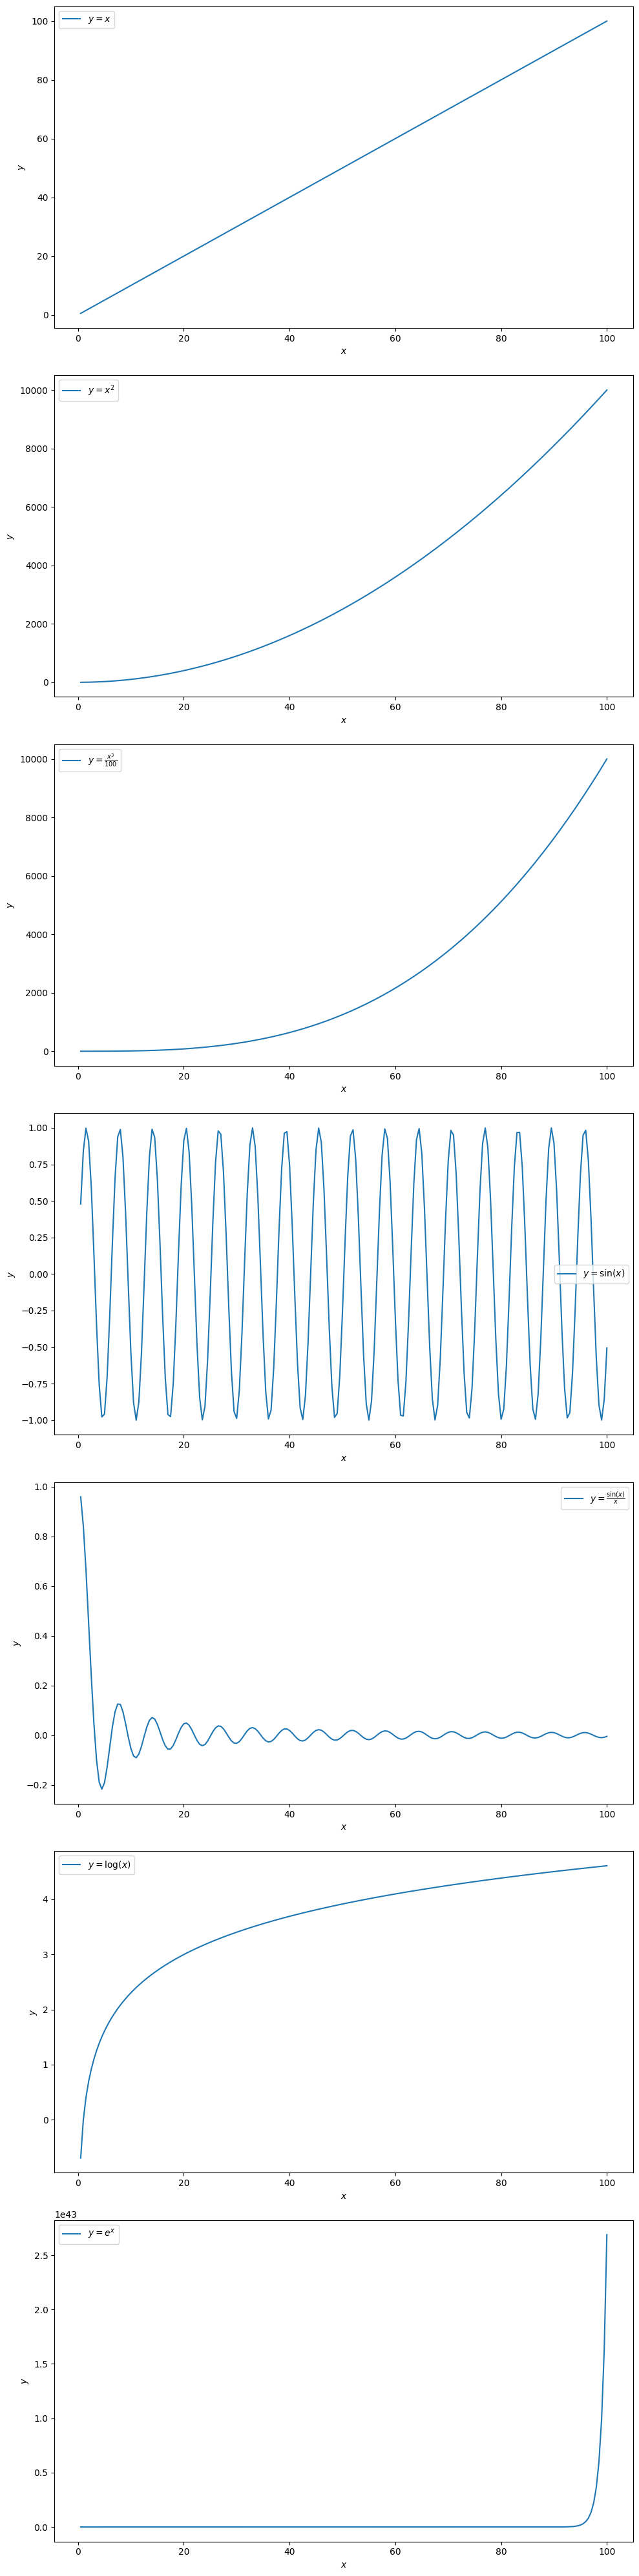

In [22]:
import matplotlib.pyplot as plt
import numpy as np

x_values = np.arange(0.5, 100.5, 0.5)

y1 = x_values
y2 = x_values**2
y3 = x_values**3 / 100
y4 = np.sin(x_values)
y5 = np.sin(x_values) / x_values
y6 = np.log(x_values)
y7 = np.exp(x_values)

fig, axs = plt.subplots(7, 1, figsize=(10, 40))

axs[0].plot(x_values, y1, label=r'$y = x$')
axs[1].plot(x_values, y2, label=r'$y = x^2$')
axs[2].plot(x_values, y3, label=r'$y = \frac{x^3}{100}$')
axs[3].plot(x_values, y4, label=r'$y = \sin(x)$')
axs[4].plot(x_values, y5, label=r'$y = \frac{\sin(x)}{x}$')
axs[5].plot(x_values, y6, label=r'$y = \log(x)$')
axs[6].plot(x_values, y7, label=r'$y = e^x$')

for i in range(7):
    axs[i].set_xlabel('$x$')
    axs[i].set_ylabel('$y$')
    axs[i].legend()

plt.tight_layout()
plt.show()


### **10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.**

In [25]:
import numpy as np
import pandas as pd

random_matrix = np.random.uniform(1, 2, size=(20, 5))

df = pd.DataFrame(random_matrix, columns=['a', 'b', 'c', 'd', 'e'])

highest_std_column = df.std(axis=0).idxmax()
lowest_mean_row = df.mean(axis=1).idxmin()

print(df)
print("\n")
print("Column with the highest standard deviation:", highest_std_column)
print("Row with the lowest mean:", lowest_mean_row)


           a         b         c         d         e
0   1.776148  1.047277  1.792083  1.166176  1.103353
1   1.671216  1.411519  1.575621  1.058586  1.413197
2   1.021830  1.764529  1.684647  1.066654  1.717797
3   1.974830  1.009088  1.046804  1.124204  1.365536
4   1.794637  1.977850  1.798618  1.307196  1.211033
5   1.034244  1.849196  1.690479  1.716981  1.720719
6   1.337228  1.658934  1.555644  1.488910  1.577258
7   1.154257  1.986445  1.532766  1.050701  1.413638
8   1.929665  1.078279  1.556126  1.177357  1.804385
9   1.445508  1.605969  1.917681  1.377243  1.367444
10  1.389293  1.862069  1.176148  1.469328  1.945697
11  1.409936  1.801205  1.346129  1.018017  1.244879
12  1.769397  1.747390  1.660935  1.647654  1.717060
13  1.272071  1.566989  1.862686  1.189744  1.795918
14  1.785954  1.011547  1.034611  1.742796  1.198324
15  1.278431  1.917154  1.329680  1.874137  1.655915
16  1.128709  1.146012  1.401368  1.131958  1.326049
17  1.692190  1.723777  1.789857  1.197776  1.

### **11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.**

In [1]:
import numpy as np
import pandas as pd

random_matrix = np.random.uniform(1, 2, size=(20, 5))

df = pd.DataFrame(random_matrix, columns=['a', 'b', 'c', 'd', 'e'])

df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

lt8_count = (df['g'] == 'LT8').sum()

std_lt8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_gt8 = df.loc[df['g'] == 'GT8', 'f'].std()

print(df)
print("\nNumber of rows where 'g' is 'LT8':", lt8_count)
print("Standard deviation of 'f' where 'g' is 'LT8':", std_lt8)
print("Standard deviation of 'f' where 'g' is 'GT8':", std_gt8)


           a         b         c         d         e         f    g
0   1.560568  1.517890  1.306350  1.764164  1.213101  7.362073  LT8
1   1.055047  1.889878  1.782088  1.093267  1.113662  6.933941  LT8
2   1.776971  1.615327  1.694056  1.159977  1.192544  7.438875  LT8
3   1.317746  1.779730  1.281808  1.359014  1.246283  6.984581  LT8
4   1.960242  1.205139  1.791364  1.126230  1.851926  7.934900  LT8
5   1.608096  1.573314  1.032136  1.752896  1.551105  7.517547  LT8
6   1.571010  1.123895  1.986787  1.418444  1.034733  7.134869  LT8
7   1.877082  1.374110  1.710415  1.549808  1.346935  7.858350  LT8
8   1.077137  1.045467  1.506216  1.501955  1.891808  7.022583  LT8
9   1.857510  1.546559  1.444282  1.102654  1.685491  7.636496  LT8
10  1.518653  1.486397  1.629967  1.345691  1.938396  7.919104  LT8
11  1.640946  1.926756  1.261841  1.414750  1.913412  8.157705  GT8
12  1.351800  1.495210  1.730473  1.126872  1.783221  7.487575  LT8
13  1.134770  1.557676  1.801655  1.266673  1.81

### **12. Write a small piece of code to explain broadcasting in numpy.**

 Broadcasting is a  feature that allows arrays of different shapes for element-wise operations. An example is presented below:

In [2]:
import numpy as np


a = np.array([[1, 2, 3],
              [4, 5, 6]])

result = a + 10

print("Original array:")
print(a)
print("\nAfter broadcasting:")
print(result)


Original array:
[[1 2 3]
 [4 5 6]]

After broadcasting:
[[11 12 13]
 [14 15 16]]


### **13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution**

In [3]:
import numpy as np

def customArgmin(arr):
    minIndex = 0
    minValue = arr[0]

    for i in range(1, len(arr)):
        if arr[i] < minValue:
            minValue = arr[i]
            minIndex = i

    return minIndex

# Example usage:
arr = np.array([4, 2, 7, 1, 9, 3])
resultCustom = customArgmin(arr)
resultNp = np.argmin(arr)

print("Custom argmin:", resultCustom)
print("NumPy argmin:", resultNp)


Custom argmin: 3
NumPy argmin: 3
